In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv')

In [4]:
df.head(10)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1
5,CH,40,6,3,0,5,2,0,2,2,1,76,1
6,CH,41,6,2,4,5,3,10,5,2,2,30,1
7,CH,51,6,2,8,8,8,9,6,4,2,84,2
8,CH,53,6,4,4,4,8,7,4,2,2,62,1
9,CH,55,6,1,6,7,7,9,5,2,2,33,1


In [5]:
df['year'].value_counts()


7    4076
6    4071
Name: year, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    8147 non-null   object
 1   idno     8147 non-null   int64 
 2   year     8147 non-null   int64 
 3   tvtot    8147 non-null   int64 
 4   ppltrst  8147 non-null   int64 
 5   pplfair  8147 non-null   int64 
 6   pplhlp   8147 non-null   int64 
 7   happy    8147 non-null   int64 
 8   sclmeet  8147 non-null   int64 
 9   sclact   8147 non-null   int64 
 10  gndr     8147 non-null   int64 
 11  agea     8147 non-null   int64 
 12  partner  8147 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 827.6+ KB


This is a biannual survey to measure the attitudes, beliefs and behavior patterns of the various populations in Europe. Using selected questions from the 2012 and 2014 editions, address the following questions. Here is the data file, and here is the codebook with information about the variable coding and content.

Note: the field idno should not be taken as a unique identifier.

1.1 Did people become less trusting from 2012 to 2014?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f82c094dd10>,
      dtype=object)

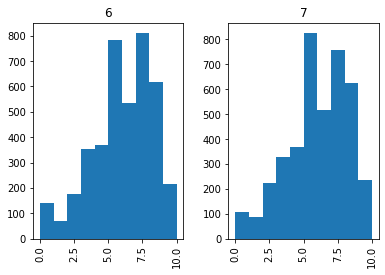

In [7]:
df['ppltrst'].hist(by = df['year']) # visual of distributions

In [8]:
df2012 = df[df['year']==6] # separate year 2012 into one DF
df2014 = df[df['year']==7] # separate year 2014 into another DF

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)


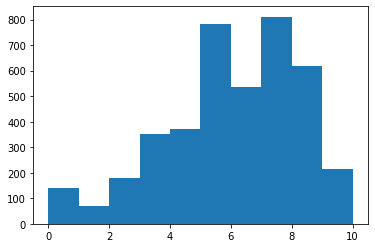

In [9]:
plt.hist(df2012['ppltrst'])
print(stats.describe(df2012['ppltrst'])) # roughly normal

DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


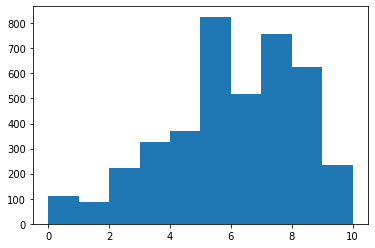

In [10]:
plt.hist(df2014['ppltrst'])
print(stats.describe(df2014['ppltrst'])) # roughly normal

In [11]:
stats.ttest_ind(df2012['ppltrst'], df2014['ppltrst'])

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

Based on the assumption that 2012 and 2014 respondents are independent groups and are normally distributed, a ttest shows no significance between the two distributions.

1.2 Did people become happier from 2012 to 2014?

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


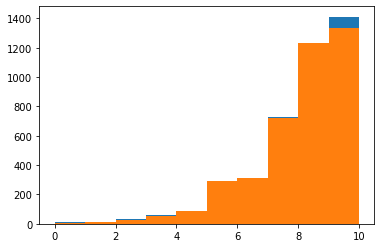

In [12]:
plt.hist(df2012['happy'])
print(stats.describe(df2012['happy'])) # not normal distribution

plt.hist(df2014['happy'])
print(stats.describe(df2014['happy'])) # not normal distribution


In [13]:
stats.shapiro(df2012['happy'])# Very low p value. Cannot reject this not a normal distribution

(0.8943395018577576, 0.0)

In [14]:
print(stats.kruskal(df2012['happy'], df2014['happy'])) #nonparametric ttest
print(df2012['happy'].mean())
print(df2014['happy'].mean())

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)
7.731515598133137
7.6854759568204125


Based on the assumption that 2012 and 2014 respondents are independent groups, a non-parametric ttest shows a trend that people were slightly less happy in 2014 compared to 2012 but the difference is not meaningful.

1.3 Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [15]:
df2014Cn = df2014[['cntry','sclmeet']].copy() # create table to allow mean calculations per social meetings
df2014Cn.head(10)
df2014Cn.groupby(['cntry']).mean() # investigating potential difference in social behavior between countries

,sclmeet
cntry,
CH,5.174966
CZ,4.495050
DE,4.428571
ES,5.263668
NO,5.310393
SE,5.434833


In [16]:
dfDE2014 = df2014[df2014['cntry']=='DE']
dfCH2014 = df2014[df2014['cntry']=='CH']
dfES2014 = df2014[df2014['cntry']=='ES']

(array([  2.,  26.,   0.,  53.,   0., 148., 136.,   0., 286.,  92.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

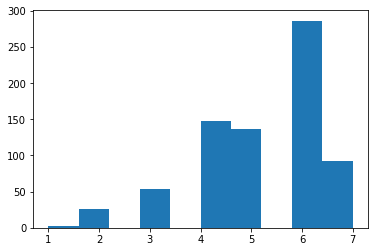

In [17]:
plt.hist(dfCH2014['sclmeet']) # not normally distributed



(array([1., 0., 0., 7., 0., 0., 5., 0., 0., 1.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <a list of 10 Patch objects>)

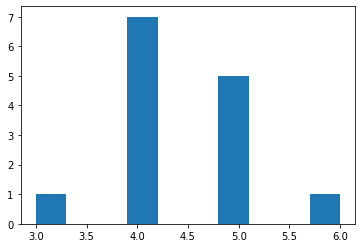

In [18]:
plt.hist(dfDE2014['sclmeet']) # not normally distributed

(array([ 16.,  53.,   0.,  62.,   0., 168., 250.,   0., 356., 229.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

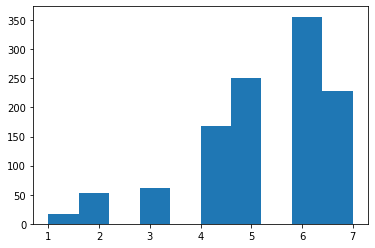

In [19]:
plt.hist(dfES2014['sclmeet']) # not normally distributed

In [20]:
stats.kruskal(dfES2014['sclmeet'],dfCH2014['sclmeet'],dfDE2014['sclmeet'])

KruskalResult(statistic=12.398774136896987, pvalue=0.0020306749196556226)

At least one of these countries is barely significant

In [21]:
print(stats.kruskal(dfES2014['sclmeet'],dfCH2014['sclmeet']))
print(stats.kruskal(dfES2014['sclmeet'],dfDE2014['sclmeet']))
print(stats.kruskal(dfCH2014['sclmeet'],dfDE2014['sclmeet']))

KruskalResult(statistic=4.510519279394005, pvalue=0.033687012038111704)
KruskalResult(statistic=8.439626051020797, pvalue=0.0036713173582643595)
KruskalResult(statistic=7.01513303763235, pvalue=0.008082362730363783)


In [22]:
print(dfDE2014['sclmeet'].mean())
print(dfCH2014['sclmeet'].mean()) #statistically lower than the other two countries
print(dfES2014['sclmeet'].mean())

4.428571428571429
5.174966352624495
5.263668430335097


A potentially meaningful difference in social meeting happens between DE vs CH and ES. Differences between CH and ES do not look too interesting.

1.4 Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

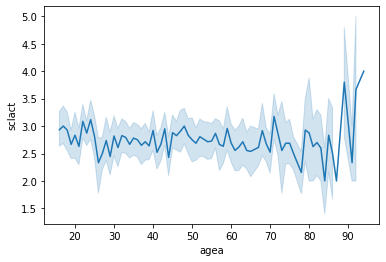

In [23]:
sns.lineplot(x='agea', y= 'sclact', data=df.loc[df['cntry'] == 'CH']) 

Ruff Figural Fluency Test This test provides information about nonverbal capacity for initiation, planning, and divergent reasoning. You can find the data here. The Casenr is a unique identifier.

Of particular use for comparing data points between measurements will be pivot() from Pandas.
https://www.parinc.com/Products/Pkey/360

In [24]:
df2 = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv')
df2.head(10)

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362
5,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 3 (2008-2012),71.0,0.5,2.376454483
6,3,54,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),91.0,11.0,Not applicable
7,3,54,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),83.5,21.0,2.628552653
8,3,54,Male,Higher secondary school (ISCED 3-4),Measurement 3 (2008-2012),77.0,17.0,3.392197125
9,4,70,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),59.0,49.0,Not applicable


2.1 Is there a significant difference in the number of unique designs drawn by the same participants from Measurement 2 to Measurement 3?

2.2 Is there a significant difference in the number of perseverative errors drawn by the same participants from Measurement 2 to Measurement 3?